<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [3]:
# your code goes here
print(df.duplicated().sum())

154


## Removing duplicates


Remove the duplicate rows from the dataframe.


In [5]:
# your code goes here
df.drop_duplicates(inplace = True)

Verify if duplicates were actually dropped.


In [6]:
# your code goes here
print(df.duplicated().sum())

0


## Finding Missing values


Find the missing values for all columns.


In [7]:
# your code goes here
df.columns[df.isnull().any()]

Index(['OpenSource', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc',
       'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow',
       'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTim

Find out how many rows are missing in the column 'WorkLoc'


In [17]:
df['EdLevel'].isna().sum()

112

In [18]:
df['Country'].isna().sum()

0

In [8]:
df['WorkLoc'].isna().sum()

32

## Imputing missing values


Find the  value counts for the column WorkLoc.


In [9]:
# your code goes here
df['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [11]:
majority = df['WorkLoc'].value_counts().idxmax()
print(majority)

Office


Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [12]:
df['WorkLoc'].fillna('Office', inplace=True)

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [13]:
df['WorkLoc'].isna().sum()

0

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [14]:
df.CompFreq.value_counts().index

Index(['Yearly', 'Monthly', 'Weekly'], dtype='object')

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


90000.0

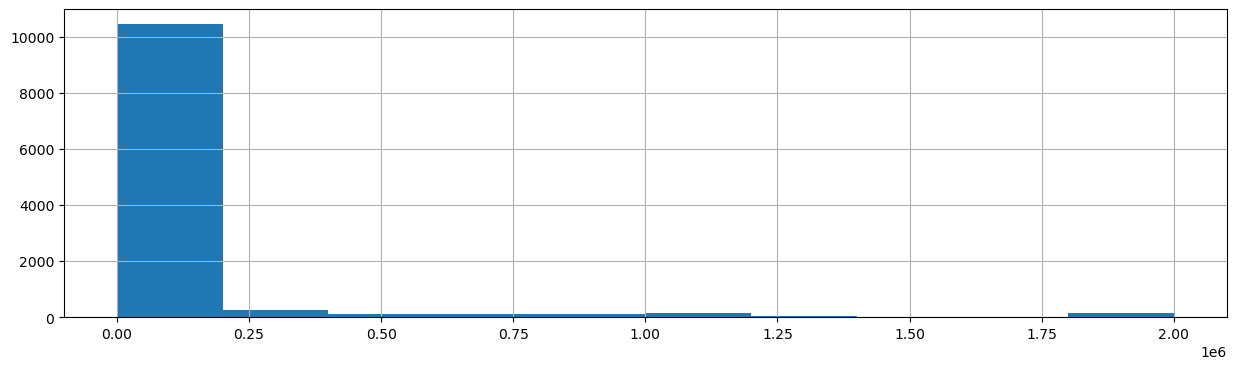

In [23]:
#List out the various categories in the column 'CompFreq'
df["CompFreq"].unique()  
#If the CompFreq is Yearly then use the exising value in CompTotal
df["CompFreq"].replace(to_replace="Yearly",value=1,inplace=True)  
#If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
df["CompFreq"].replace(to_replace="Monthly",value=12,inplace=True)  
#If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)
df["CompFreq"].replace(to_replace="Weekly",value=52,inplace=True)  
df["CompFreq"].unique()
df["CompFreq"].value_counts()
#it makes comparison of salaries easy.
df['NormalizedAnnualCompensation'] = df["CompTotal"] * df["CompFreq"]  
df["Respondent"].nunique()
df["ConvertedComp"].describe()
df["ConvertedComp"].hist(figsize=(15,4))
df['NormalizedAnnualCompensation'].median()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
